In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [151]:
df=pd.read_csv("train.csv")

In [152]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  d5ef0e51d2f7cc  6201db6524addd  0abd54baf538f9        0       1   
1  796c77b15772e8  2f4ba5d01e8b61  4a80eaf5b09cb1        0       4   
2  361fd477c3416d  5828bdb4d84060  510e6e0b2db210        0       0   
3  3fc327f32d280f  1b9fc490905dd3  17cc47b32e11a1        0       0   
4  c26074655d0194  7c0636aeac7d3e  d321e78bae0840        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0        186.0      0              0      0         43  ...        0   
1        353.8      2              1      7          4  ...        1   
2          0.0      0              0      1         65  ...        0   
3          0.0      0              0      0         85  ...        0   
4        119.7      2              0      0         18  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0           0.0          0           0.0          0               0   
1        1877.0          0           0.0          0               0   
2           0.0          0           0.0          0               0   
3           0.0          0           0.0          0               0   
4           0.0          0           0.0          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0         74.32                2          0        0.2604  
1       1732.00                4          0        0.7045  
2         75.47                1       1694        0.2692  
3        153.50                2          0        0.1034  
4        194.20                4          0        0.1923  

[5 rows x 29 columns]

In [153]:
df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06   2.979467e+06   
mean   2.338042e-01  1.107719e+00  1.307676e+02  6.580959e-01   2.270379e-01   
std    5.881412e-01  1.716574e+00  1.708132e+02  1.145698e+00   6.024485e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.437000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  2.800000e+01  5.990000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06   
mean   1.371245e+00  4.758193e+01  5.050374e+02  9.255350e-01  5.443259e-01   
std    2.680303e+00  2.746205e+01  6.275943e+02  1.559334e+00  7.109235e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    7.300000e+01  1.010000e+02  2.154000e+03  7.200000e+01  2.000000e+01   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06   
mean   ...  1.648241e-01  6.066944e+02  3.475118e-03  4.512207e+00   
std    ...  4.727409e-01  1.498534e+03  7.268309e-02  3.046553e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  4.058000e-01  0.000000e+00  0.000000e+00   
max    ...  3.900000e+01  4.071000e+04  1.400000e+01  3.514000e+03   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  2.979467e+06     2.979467e+06  2.979467e+06     2.979467e+06   
mean   2.383614e-02     7.916517e-03  1.154899e+03     3.660597e+00   
std    1.674755e-01     9.271241e-02  1.183850e+03     2.456606e+00   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    0.000000e+00     0.000000e+00  1.553000e+02     2.000000e+00   
50%    0.000000e+00     0.000000e+00  6.865000e+02     3.000000e+00   
75%    0.000000e+00     0.000000e+00  1.978000e+03     5.000000e+00   
max    1.200000e+01     5.000000e+00  2.578000e+04     2.360000e+02   

          winPoints  winPlacePerc  
count  2.979467e+06  2.979466e+06  
mean   6.064248e+02  4.729253e-01  
std    7.397088e+02  3.074121e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.000000e-01  
50%    0.000000e+00  4.583000e-01  
75%    1.495000e+03  7.407000e-01  
max    2.002000e+03  1.000000e+00  

[8 rows x 25 columns]

In [154]:
print(df["killPoints"].mean())
print(df["winPoints"].mean())
print(df["rankPoints"].mean())

505.0374093755695
606.4247605360288
892.0222627067191


In [155]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [156]:
df.drop(axis="rows",labels=df.index[df["winPlacePerc"].isna()],inplace=True)

In [157]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [158]:
df

Id         groupId         matchId  assists  boosts  \
0        d5ef0e51d2f7cc  6201db6524addd  0abd54baf538f9        0       1   
1        796c77b15772e8  2f4ba5d01e8b61  4a80eaf5b09cb1        0       4   
2        361fd477c3416d  5828bdb4d84060  510e6e0b2db210        0       0   
3        3fc327f32d280f  1b9fc490905dd3  17cc47b32e11a1        0       0   
4        c26074655d0194  7c0636aeac7d3e  d321e78bae0840        0       0   
...                 ...             ...             ...      ...     ...   
2979462  fb5c522cb1a9eb  f02bf0eeac85ea  86032b4e374c74        0       8   
2979463  fab9d9a7726b60  115a85181a2a0b  84bf0c2075b8b7        0       1   
2979464  6f609b3e78df51  9fc1a2628c980a  8e6aee43c09e08        0       0   
2979465  89604bf95ea5a2  1dbf697dad19e4  f2672978cc29d6        0       1   
2979466  93e57670813f8e  f657902761e60c  b069f2b87d75f9        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0             186.00      0              0      0         43  ...        0   
1             353.80      2              1      7          4  ...        1   
2               0.00      0              0      1         65  ...        0   
3               0.00      0              0      0         85  ...        0   
4             119.70      2              0      0         18  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
2979462        29.83      0              0      2         41  ...        0   
2979463         0.00      0              0      4         61  ...        0   
2979464         0.00      0              0      0         84  ...        0   
2979465       386.20      1              0      1          9  ...        0   
2979466        50.31      0              0      0         48  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0                0.00          0           0.0          0               0   
1             1877.00          0           0.0          0               0   
2                0.00          0           0.0          0               0   
3                0.00          0           0.0          0               0   
4                0.00          0           0.0          0               0   
...               ...        ...           ...        ...             ...   
2979462          0.00          0           0.0          0               0   
2979463         86.49          0           0.0          0               0   
2979464          0.00          0           0.0          0               0   
2979465          0.00          0           0.0          0               0   
2979466          0.00          0         181.5          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0               74.32                2          0        0.2604  
1             1732.00                4          0        0.7045  
2               75.47                1       1694        0.2692  
3              153.50                2          0        0.1034  
4              194.20                4          0        0.1923  
...               ...              ...        ...           ...  
2979462       2052.00                5          0        0.9231  
2979463       1053.00                3          0        0.4211  
2979464          0.00                0          0        0.0000  
2979465       2026.00                6          0        0.7111  
2979466       1676.00                5          0        0.8125  

[2979466 rows x 29 columns]

In [159]:
df.loc[df.rankPoints>-1]

Id         groupId         matchId  assists  boosts  \
0        d5ef0e51d2f7cc  6201db6524addd  0abd54baf538f9        0       1   
1        796c77b15772e8  2f4ba5d01e8b61  4a80eaf5b09cb1        0       4   
3        3fc327f32d280f  1b9fc490905dd3  17cc47b32e11a1        0       0   
4        c26074655d0194  7c0636aeac7d3e  d321e78bae0840        0       0   
6        3428eb76d71157  fc63223ccda112  af119429bc890b        1       0   
...                 ...             ...             ...      ...     ...   
2979462  fb5c522cb1a9eb  f02bf0eeac85ea  86032b4e374c74        0       8   
2979463  fab9d9a7726b60  115a85181a2a0b  84bf0c2075b8b7        0       1   
2979464  6f609b3e78df51  9fc1a2628c980a  8e6aee43c09e08        0       0   
2979465  89604bf95ea5a2  1dbf697dad19e4  f2672978cc29d6        0       1   
2979466  93e57670813f8e  f657902761e60c  b069f2b87d75f9        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0             186.00      0              0      0         43  ...        0   
1             353.80      2              1      7          4  ...        1   
3               0.00      0              0      0         85  ...        0   
4             119.70      2              0      0         18  ...        0   
6              87.90      0              0      0         74  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
2979462        29.83      0              0      2         41  ...        0   
2979463         0.00      0              0      4         61  ...        0   
2979464         0.00      0              0      0         84  ...        0   
2979465       386.20      1              0      1          9  ...        0   
2979466        50.31      0              0      0         48  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0                0.00          0           0.0          0               0   
1             1877.00          0           0.0          0               0   
3                0.00          0           0.0          0               0   
4                0.00          0           0.0          0               0   
6              151.80          0           0.0          0               0   
...               ...        ...           ...        ...             ...   
2979462          0.00          0           0.0          0               0   
2979463         86.49          0           0.0          0               0   
2979464          0.00          0           0.0          0               0   
2979465          0.00          0           0.0          0               0   
2979466          0.00          0         181.5          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0               74.32                2          0        0.2604  
1             1732.00                4          0        0.7045  
3              153.50                2          0        0.1034  
4              194.20                4          0        0.1923  
6              379.90                3          0        0.1852  
...               ...              ...        ...           ...  
2979462       2052.00                5          0        0.9231  
2979463       1053.00                3          0        0.4211  
2979464          0.00                0          0        0.0000  
2979465       2026.00                6          0        0.7111  
2979466       1676.00                5          0        0.8125  

[1839451 rows x 29 columns]

In [160]:
df.loc[df["rankPoints"]==-1,"rankPoints"]=np.nan
df.loc[((df["rankPoints"]!=-1) & (df["killPoints"]==0)),"killPoints"]=np.nan
df.loc[((df["rankPoints"]!=-1) & (df["winPoints"]==0)),"winPoints"]=np.nan

In [161]:
df.isna().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints         1779375
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
maxPlace                 0
numGroups                0
rankPoints         1140015
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints          1779375
winPlacePerc             0
dtype: int64

In [162]:
print(df["killPoints"].mean())
print(df["winPoints"].mean())
print(df["rankPoints"].mean())

1253.8568283571828
1505.5712958433985
1445.479839365115


In [163]:
df.loc[df["killPoints"].isna(),"killPoints"]=df["killPoints"].mean()
df.loc[df["winPoints"].isna(),"winPoints"]=df["winPoints"].mean()
df.loc[df["rankPoints"].isna(),"rankPoints"]=df["rankPoints"].mean()

In [164]:
testdf=df

In [165]:
df.nunique()

Id                 2979466
groupId            1681662
matchId              47964
assists                 18
boosts                  25
damageDealt          28172
DBNOs                   37
headshotKills           30
heals                   59
killPlace              101
killPoints            1648
kills                   54
killStreaks             16
longestKill          27117
matchDuration         1266
matchType               16
maxPlace                99
numGroups              100
rankPoints            2075
revives                 24
rideDistance         30768
roadKills               13
swimDistance         26362
teamKills               11
vehicleDestroys          6
walkDistance         36933
weaponsAcquired         91
winPoints             1362
winPlacePerc          2923
dtype: int64

In [166]:
df["matchType"].unique()

array(['solo-fpp', 'duo', 'squad', 'squad-fpp', 'duo-fpp', 'solo',
       'normal-duo-fpp', 'normal-squad-fpp', 'crashfpp', 'flarefpp',
       'normal-solo-fpp', 'flaretpp', 'normal-duo', 'normal-squad',
       'normal-solo', 'crashtpp'], dtype=object)

In [167]:
lbl_encodr=LabelEncoder()
new_type=lbl_encodr.fit_transform(df["matchType"])
new_type

array([13,  2, 14, ..., 15,  2, 13])

In [168]:
df["matchType"]

0           solo-fpp
1                duo
2              squad
3          squad-fpp
4          squad-fpp
             ...    
2979462        squad
2979463         solo
2979464    squad-fpp
2979465          duo
2979466     solo-fpp
Name: matchType, Length: 2979466, dtype: object

In [169]:
df["matchType"]=new_type
df["matchType"].head()

0    13
1     2
2    14
3    15
4    15
Name: matchType, dtype: int64

In [170]:
new_type=lbl_encodr.fit_transform(df["groupId"])
new_type

array([ 645364,  311343,  580803, ..., 1050496,  195710, 1618330])

In [171]:
df["groupId"]=new_type
df.head()

Id  groupId         matchId  assists  boosts  damageDealt  \
0  d5ef0e51d2f7cc   645364  0abd54baf538f9        0       1        186.0   
1  796c77b15772e8   311343  4a80eaf5b09cb1        0       4        353.8   
2  361fd477c3416d   580803  510e6e0b2db210        0       0          0.0   
3  3fc327f32d280f   181474  17cc47b32e11a1        0       0          0.0   
4  c26074655d0194   816158  d321e78bae0840        0       0        119.7   

   DBNOs  headshotKills  heals  killPlace  ...  revives  rideDistance  \
0      0              0      0         43  ...        0           0.0   
1      2              1      7          4  ...        1        1877.0   
2      0              0      1         65  ...        0           0.0   
3      0              0      0         85  ...        0           0.0   
4      2              0      0         18  ...        0           0.0   

   roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
0          0           0.0          0                0         74.32   
1          0           0.0          0                0       1732.00   
2          0           0.0          0                0         75.47   
3          0           0.0          0                0        153.50   
4          0           0.0          0                0        194.20   

   weaponsAcquired    winPoints  winPlacePerc  
0                2  1505.571296        0.2604  
1                4  1505.571296        0.7045  
2                1  1694.000000        0.2692  
3                2  1505.571296        0.1034  
4                4  1505.571296        0.1923  

[5 rows x 29 columns]

In [172]:
new_type=lbl_encodr.fit_transform(df["matchId"])
df["matchId"]=new_type
df.head()

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0  d5ef0e51d2f7cc   645364     1976        0       1        186.0      0   
1  796c77b15772e8   311343    13894        0       4        353.8      2   
2  361fd477c3416d   580803    15093        0       0          0.0      0   
3  3fc327f32d280f   181474     4360        0       0          0.0      0   
4  c26074655d0194   816158    39502        0       0        119.7      2   

   headshotKills  heals  killPlace  ...  revives  rideDistance  roadKills  \
0              0      0         43  ...        0           0.0          0   
1              1      7          4  ...        1        1877.0          0   
2              0      1         65  ...        0           0.0          0   
3              0      0         85  ...        0           0.0          0   
4              0      0         18  ...        0           0.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0          0                0         74.32                2   
1           0.0          0                0       1732.00                4   
2           0.0          0                0         75.47                1   
3           0.0          0                0        153.50                2   
4           0.0          0                0        194.20                4   

     winPoints  winPlacePerc  
0  1505.571296        0.2604  
1  1505.571296        0.7045  
2  1694.000000        0.2692  
3  1505.571296        0.1034  
4  1505.571296        0.1923  

[5 rows x 29 columns]

In [173]:
new_type=lbl_encodr.fit_transform(df["Id"])
df["Id"]=new_type
df.head()

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0  2489947   645364     1976        0       1        186.0      0   
1  1412740   311343    13894        0       4        353.8      2   
2   628654   580803    15093        0       0          0.0      0   
3   740829   181474     4360        0       0          0.0      0   
4  2262435   816158    39502        0       0        119.7      2   

   headshotKills  heals  killPlace  ...  revives  rideDistance  roadKills  \
0              0      0         43  ...        0           0.0          0   
1              1      7          4  ...        1        1877.0          0   
2              0      1         65  ...        0           0.0          0   
3              0      0         85  ...        0           0.0          0   
4              0      0         18  ...        0           0.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0          0                0         74.32                2   
1           0.0          0                0       1732.00                4   
2           0.0          0                0         75.47                1   
3           0.0          0                0        153.50                2   
4           0.0          0                0        194.20                4   

     winPoints  winPlacePerc  
0  1505.571296        0.2604  
1  1505.571296        0.7045  
2  1694.000000        0.2692  
3  1505.571296        0.1034  
4  1505.571296        0.1923  

[5 rows x 29 columns]

In [174]:
df.index[df.duplicated()]

Int64Index([], dtype='int64')

In [175]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [176]:
dfnum=df.drop(axis="columns",labels=["Id","groupId","matchId","matchType"])
dfcat=df.drop(axis="columns",labels=dfnum.columns.to_list())

In [177]:
sns.set(rc={'figure.figsize':(6,5)})

assists


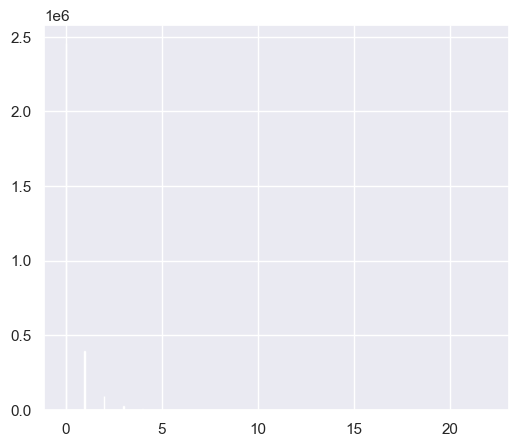

boosts


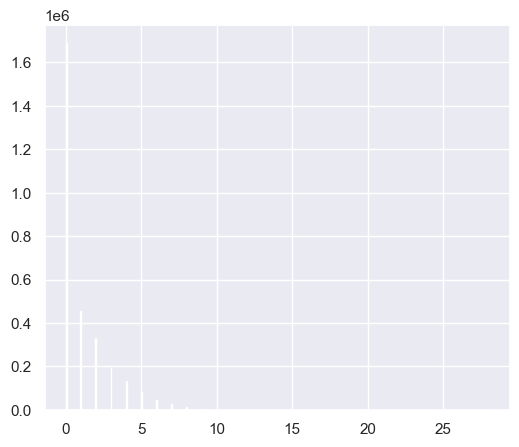

damageDealt


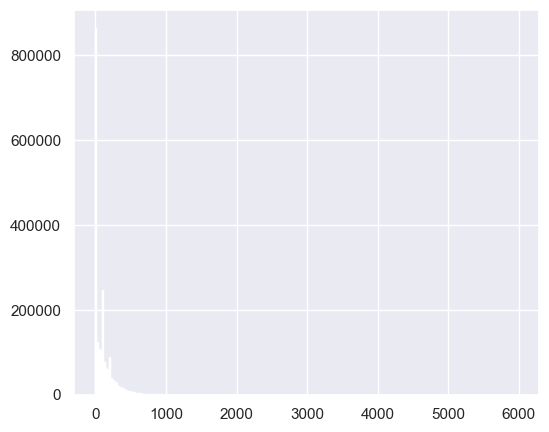

DBNOs


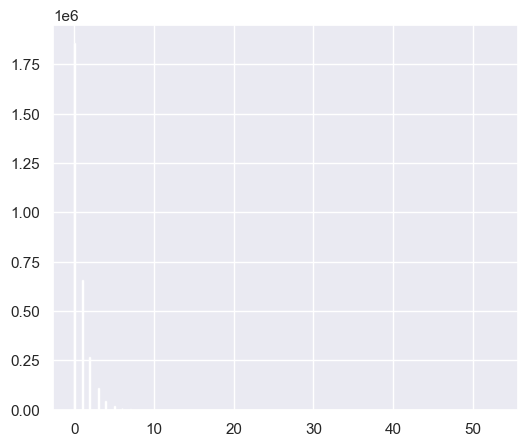

headshotKills


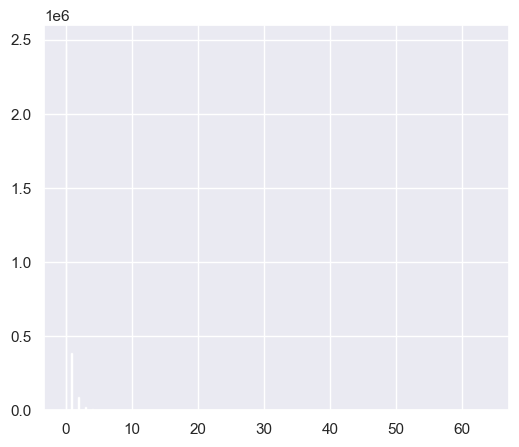

heals


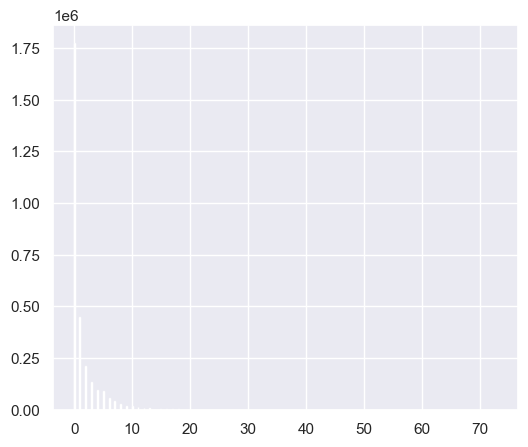

killPlace


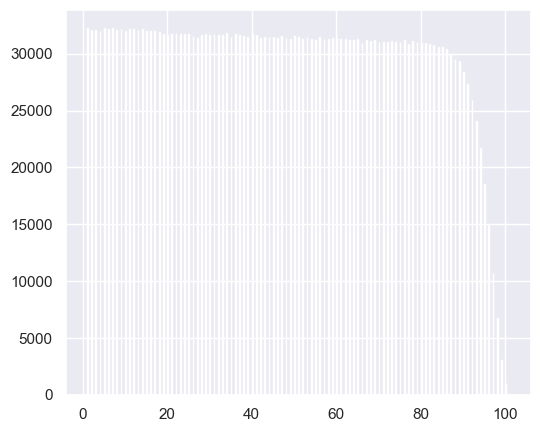

killPoints


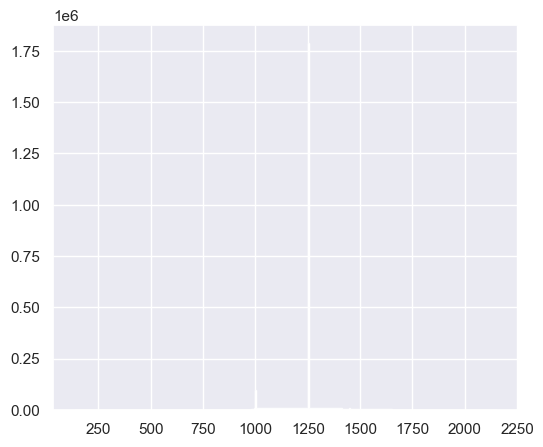

kills


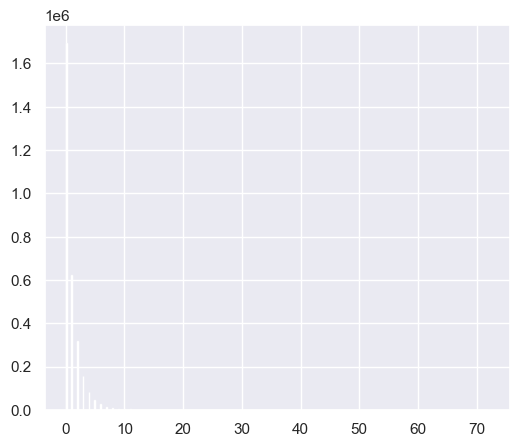

killStreaks


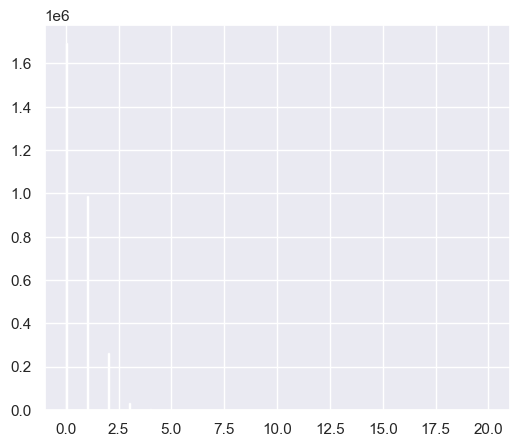

longestKill


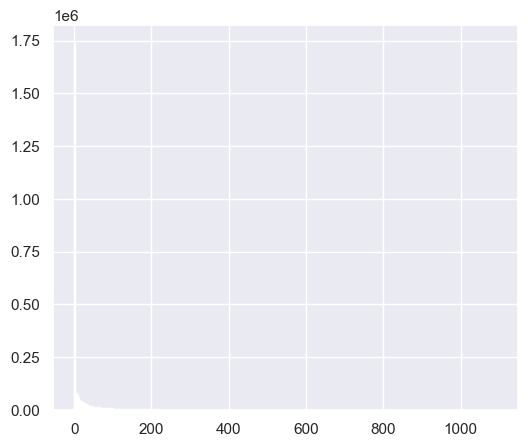

matchDuration


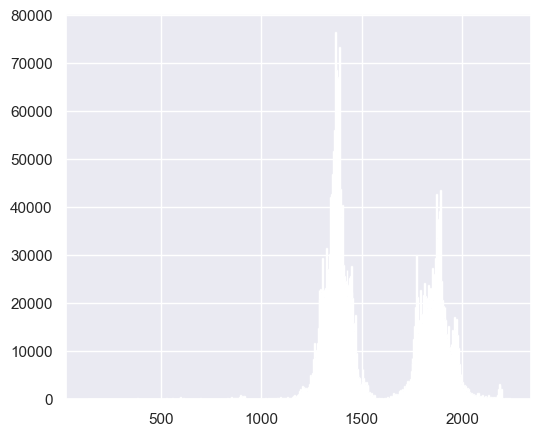

maxPlace


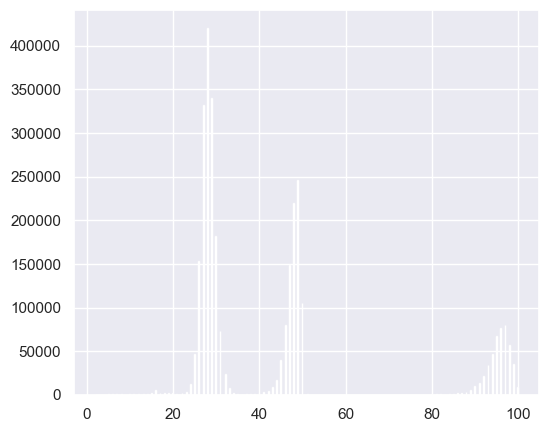

numGroups


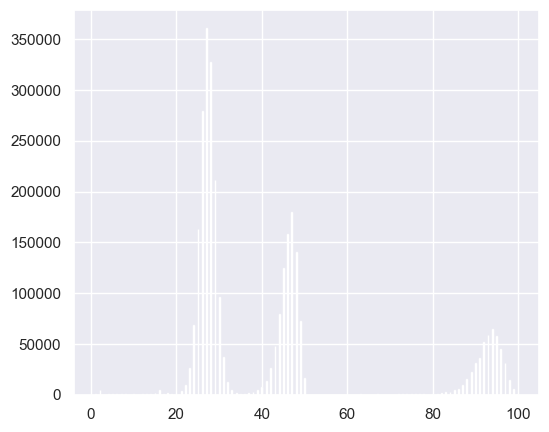

rankPoints


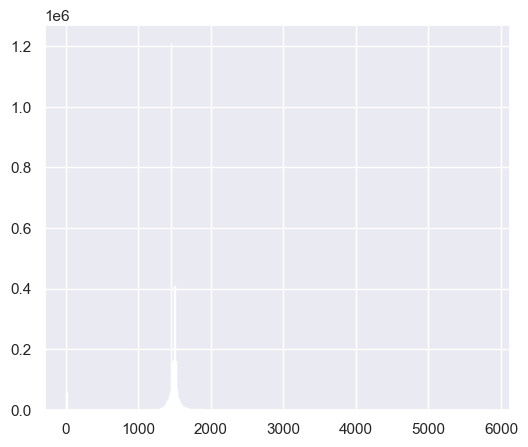

revives


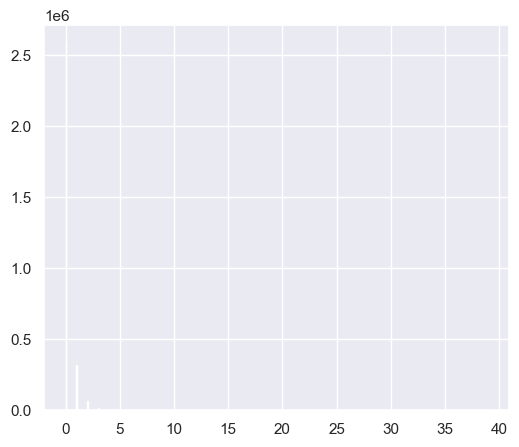

rideDistance


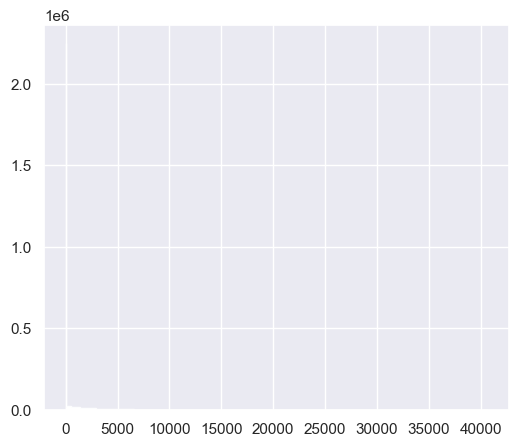

roadKills


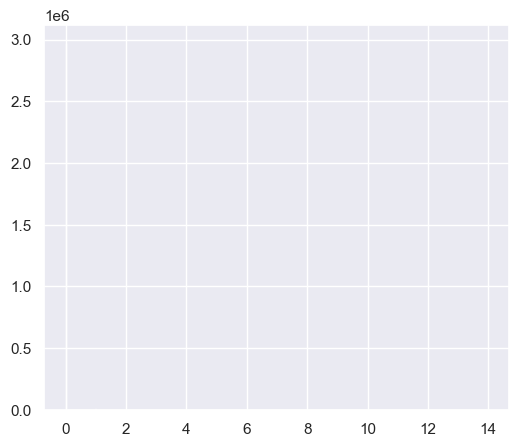

swimDistance


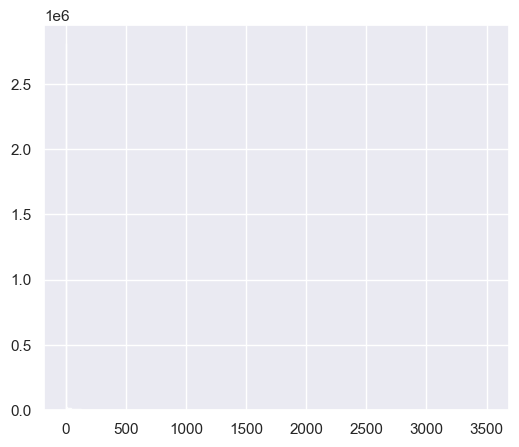

teamKills


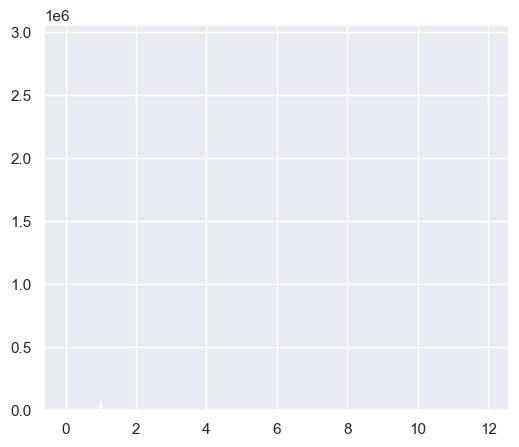

vehicleDestroys


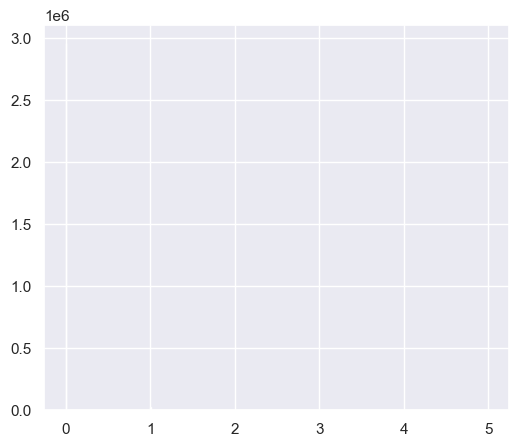

walkDistance


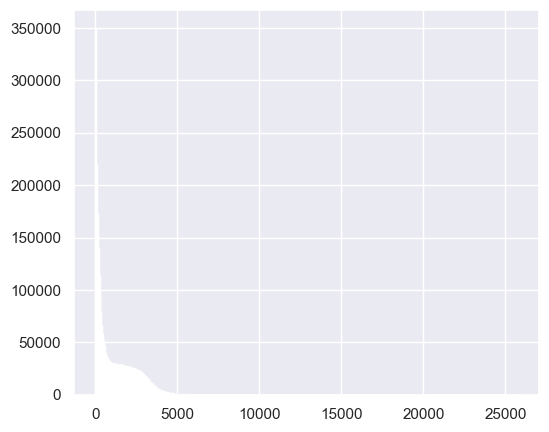

weaponsAcquired


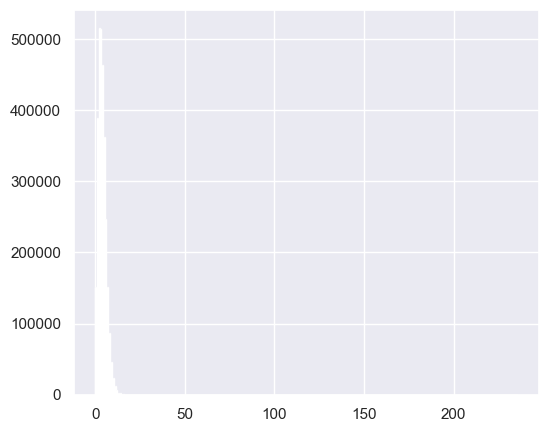

winPoints


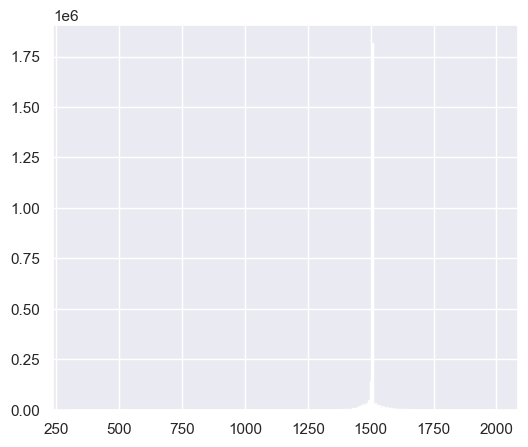

winPlacePerc


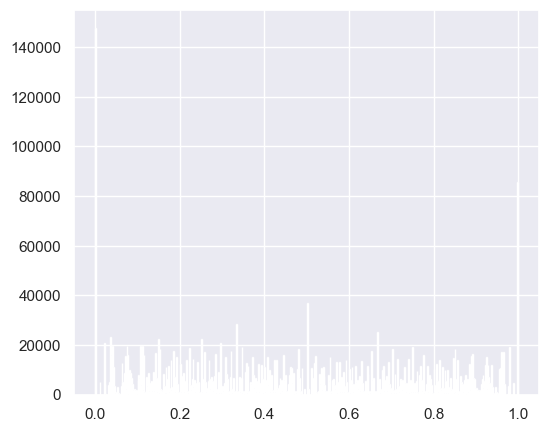

In [178]:
for i in dfnum.columns:
    plt.hist(df[i],bins=500)
    print(i)
    plt.show()

In [179]:
#plt.hist(np.power(testdf["matchDuration"],2),bins=500)
#plt.show()

In [180]:
#testdf_cont=testdfnum.drop(axis="columns",labels=["matchDuration","winPlacePerc"])
#for i in testdf_cont.columns:
#    plt.hist(np.power(testdf_cont[i],1/2.05),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_cont[i],1/2.05)

In [181]:
#testdf_new=pd.DataFrame()
#testdf_new["damageDealt"]=testdf["damageDealt"]
#testdf_new["walkDistance"]=testdf["walkDistance"]
#testdf_new["weaponsAcquired"]=testdf["weaponsAcquired"]

In [182]:
#testdf_new

In [183]:
#for i in testdf_new.columns:
#    plt.hist(np.power(testdf_new[i],1/2),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_new[i],1/2)

In [184]:
#testdf["matchDuration"]=np.power(testdf["matchDuration"],2)

#for i in testdf_cont.columns:
#    testdf[i]=testdf_cont[i]

#for i in testdf_new.columns:
#    testdf[i]=testdf_new[i]

#testdf

In [185]:
class Standardizer():
    def __init__(self,meu,stdv):
        self.meu=meu
        self.stdv=stdv

    def scale(self,x):
        return (x - self.meu)/(self.stdv)

assists


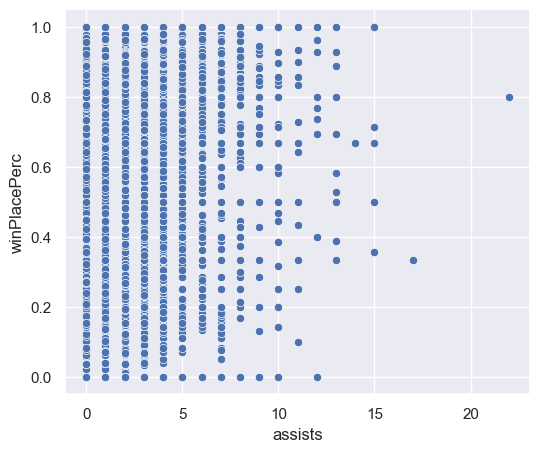

boosts


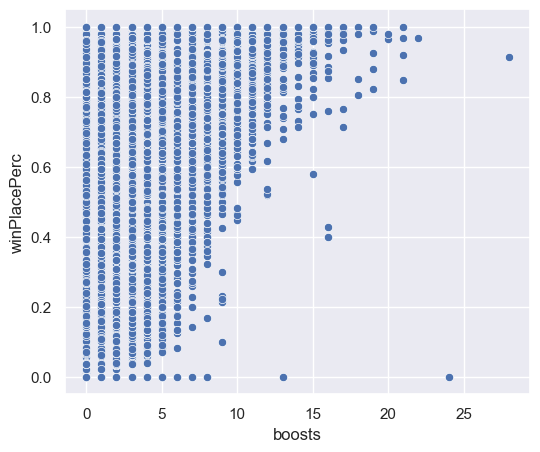

damageDealt


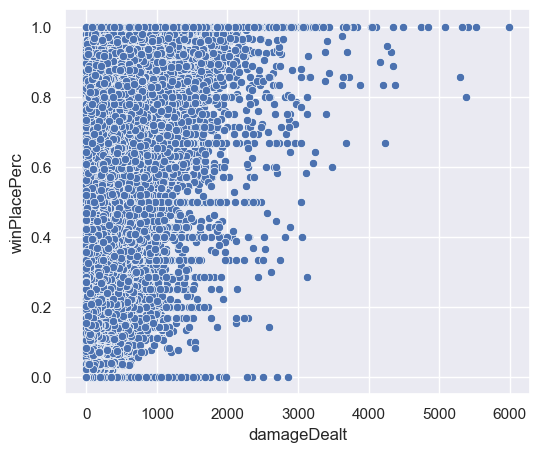

DBNOs


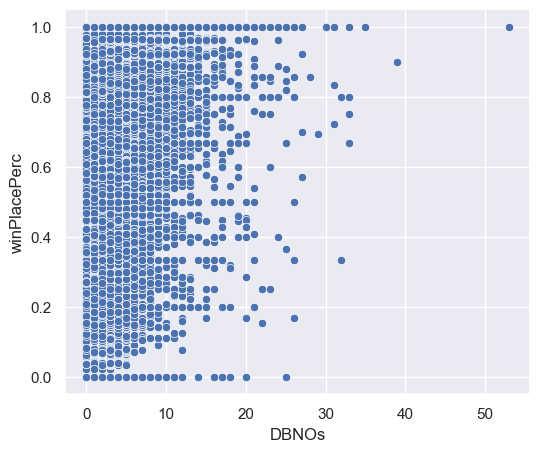

headshotKills


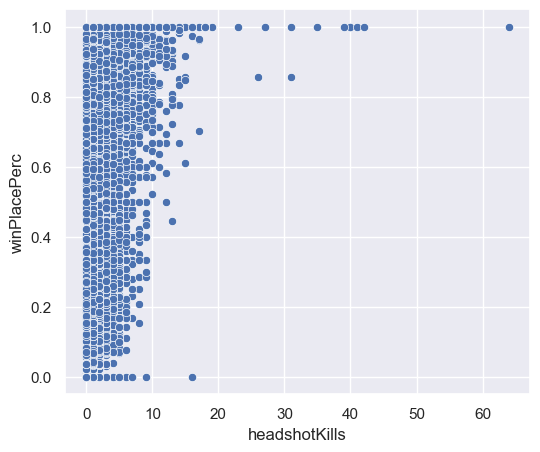

heals


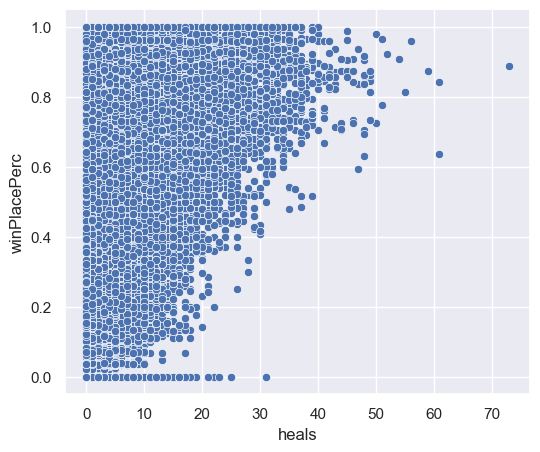

killPlace


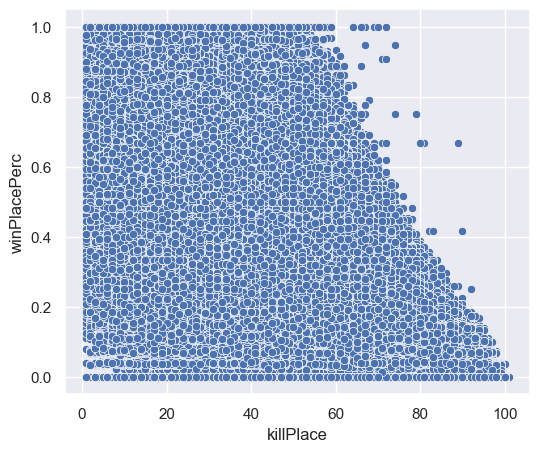

killPoints


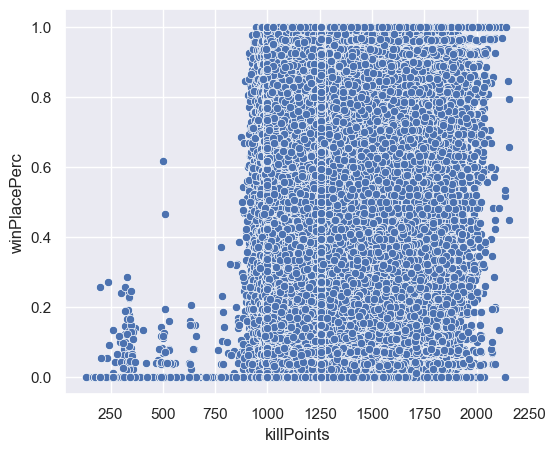

kills


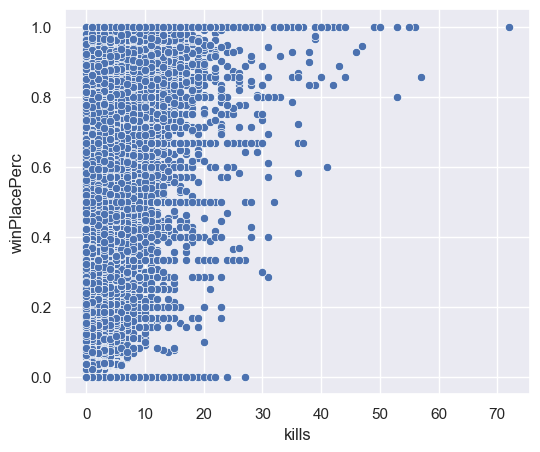

killStreaks


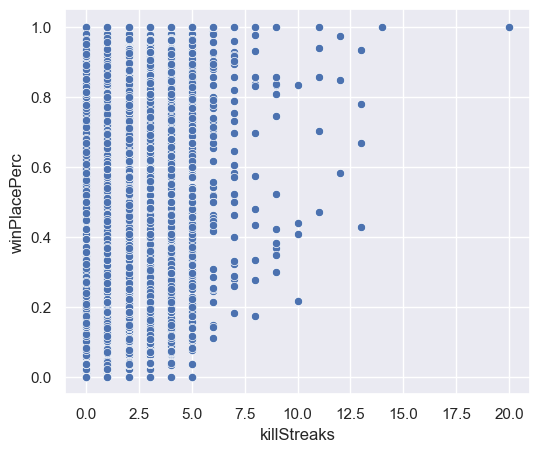

longestKill


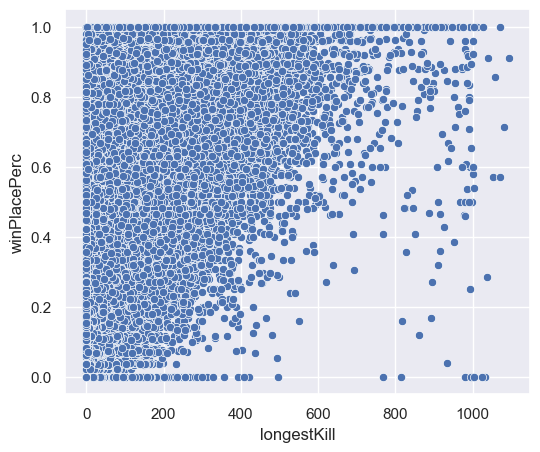

matchDuration


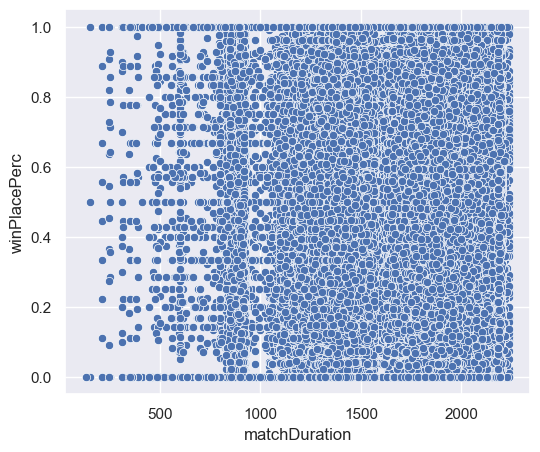

maxPlace


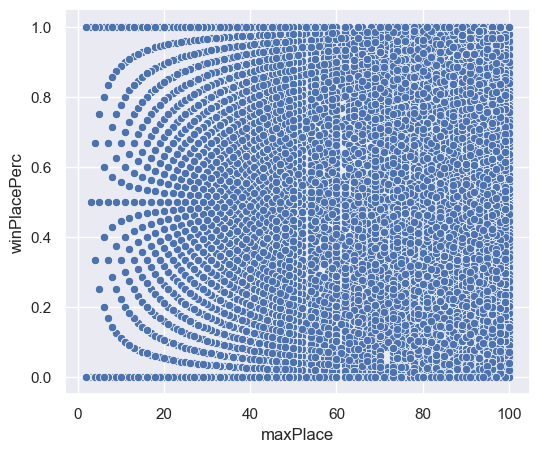

numGroups


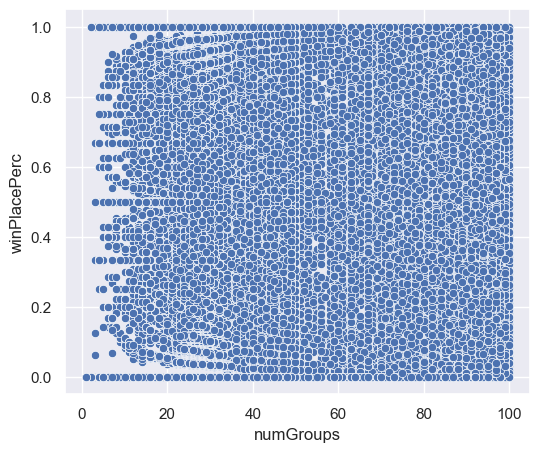

rankPoints


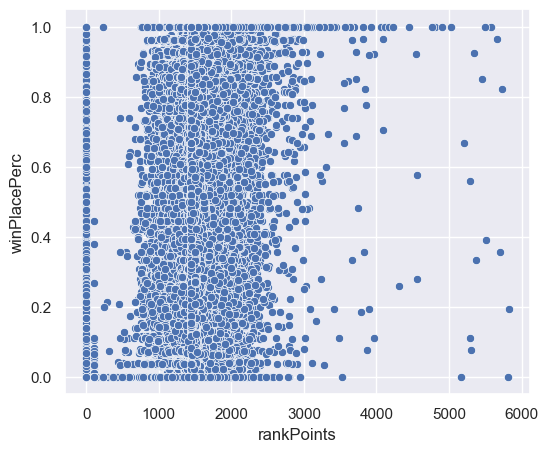

revives


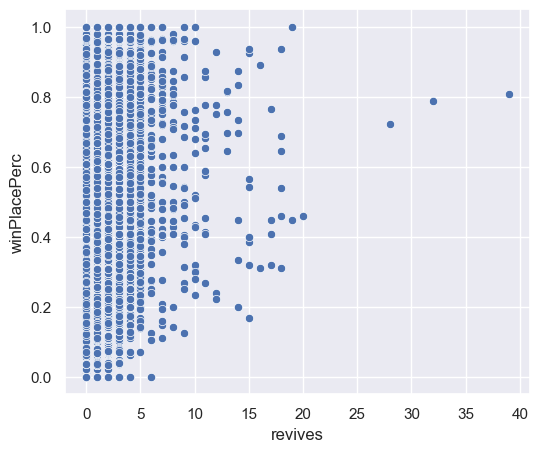

rideDistance


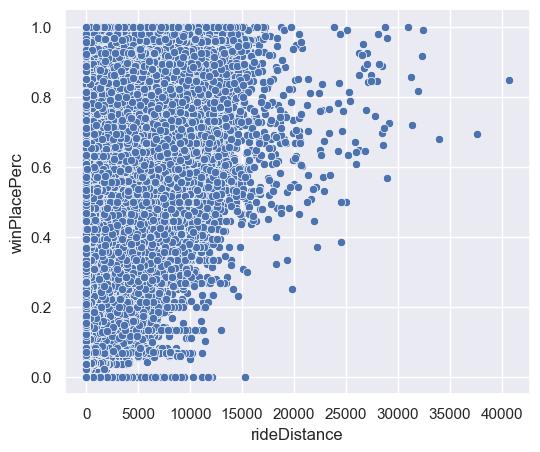

roadKills


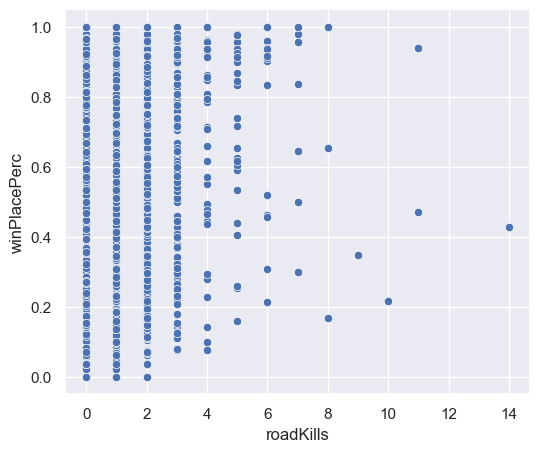

swimDistance


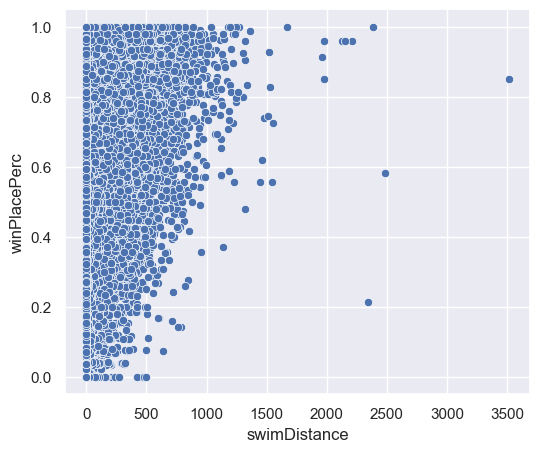

teamKills


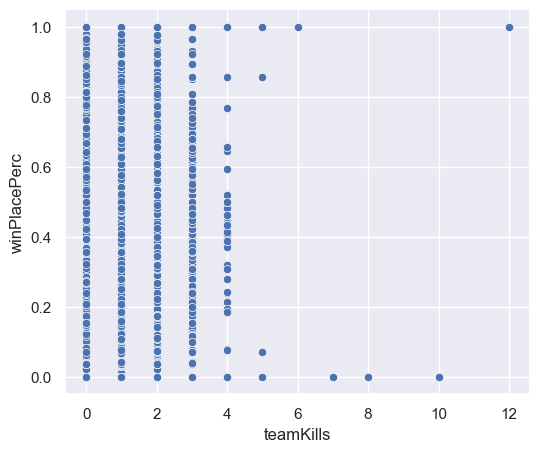

vehicleDestroys


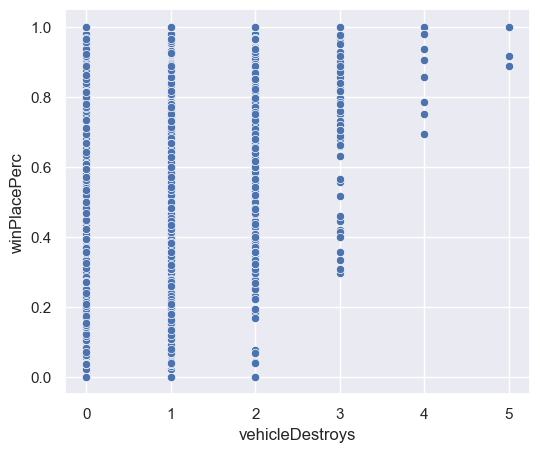

walkDistance


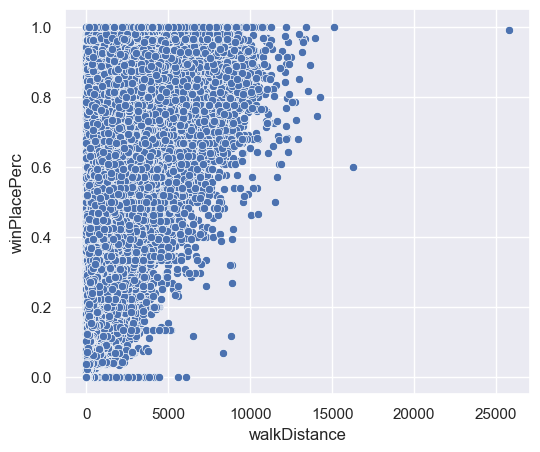

weaponsAcquired


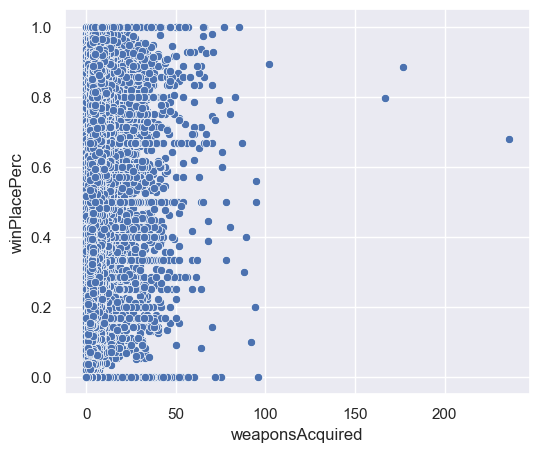

winPoints


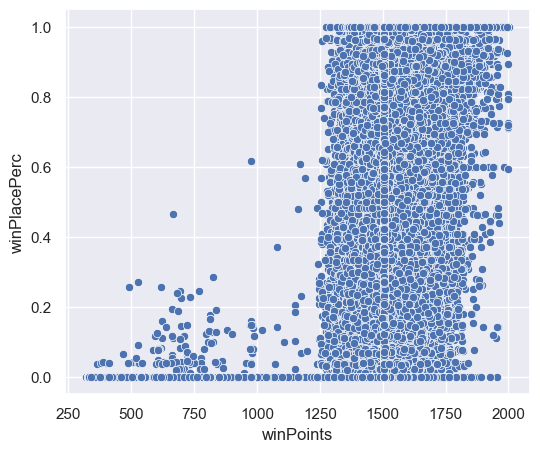

winPlacePerc


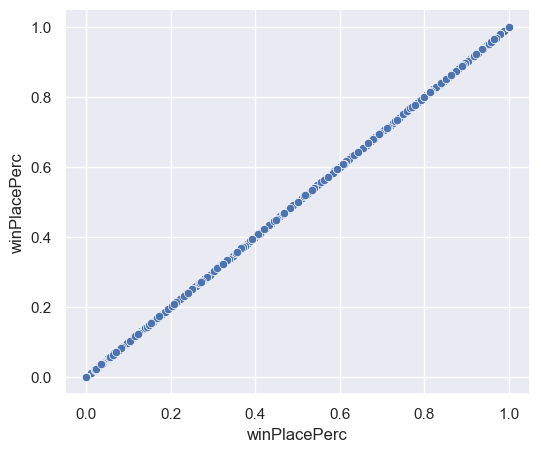

In [186]:
for i in dfnum.columns:
    #sns.boxplot(x=dfnum[i])
    sns.scatterplot(x=df[i],y=df["winPlacePerc"])
    print(i)
    plt.show()

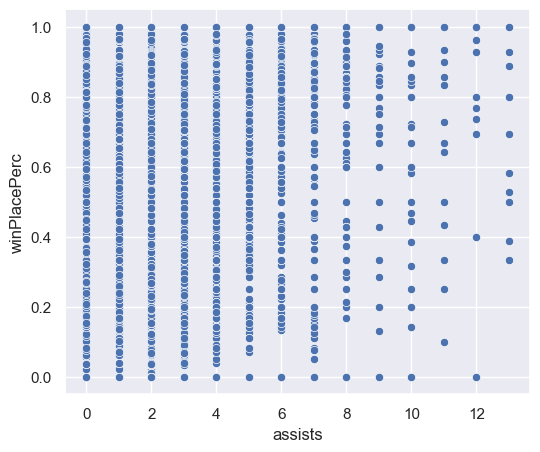

In [187]:
sns.scatterplot(x=testdf.loc[testdf["assists"]<13.7,"assists"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["assists"]<13.7]

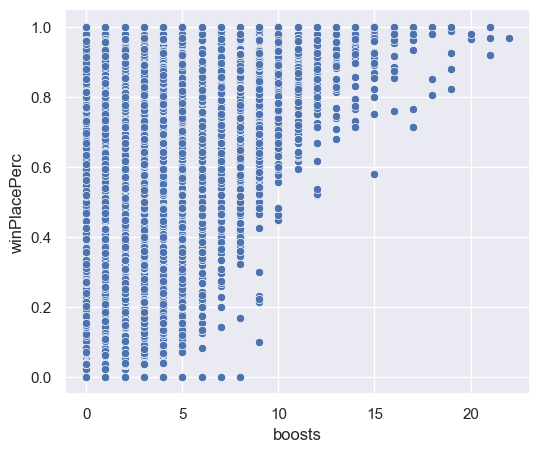

In [188]:
sns.scatterplot(x=df.loc[((-df["boosts"]+13.5*df["winPlacePerc"])>-9),"boosts"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((-df["boosts"]+13.5*df["winPlacePerc"])>-9)]

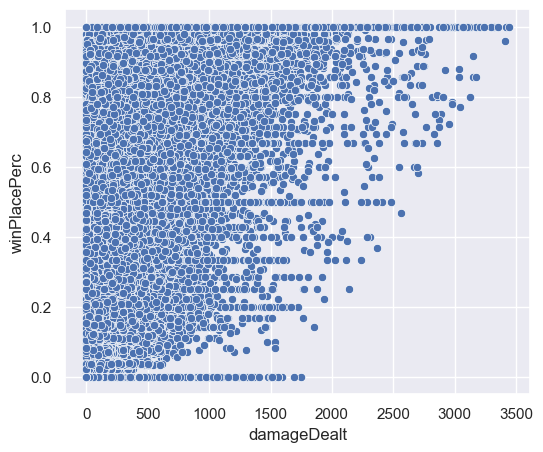

In [189]:
sns.scatterplot(x=df.loc[((-df["damageDealt"]+1750*df["winPlacePerc"]>-1750)),"damageDealt"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((-df["damageDealt"]+1750*df["winPlacePerc"]>-1750))]

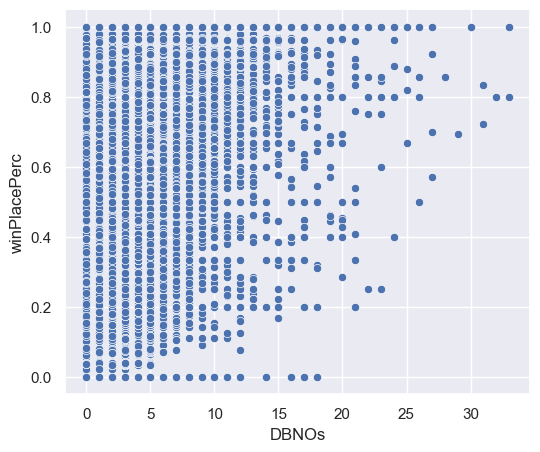

In [190]:
sns.scatterplot(x=df.loc[((20*df["winPlacePerc"]-df["DBNOs"]>-25)&(df["DBNOs"]<35)),"DBNOs"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((20*df["winPlacePerc"]-df["DBNOs"]>-25)&(df["DBNOs"]<35))]

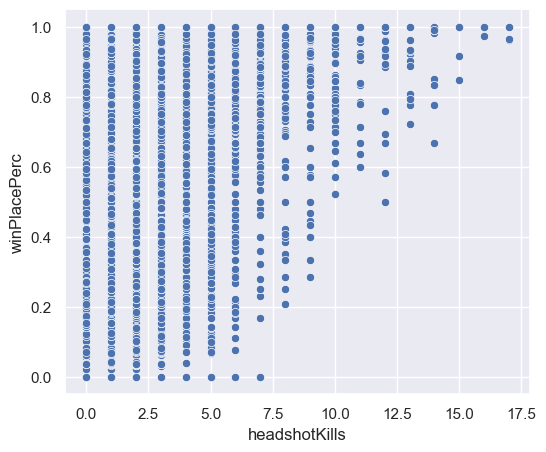

In [191]:
sns.scatterplot(x=df.loc[(-df["headshotKills"]+10.5*df["winPlacePerc"]>-7.5),"headshotKills"],y=df["winPlacePerc"])
plt.show()
df=df.loc[(-df["headshotKills"]+10.5*df["winPlacePerc"]>-7.5)]

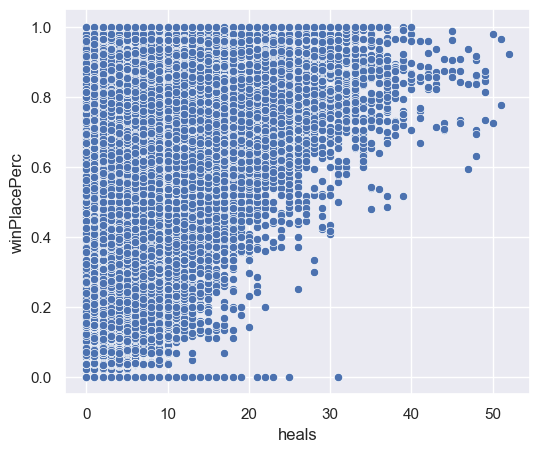

In [192]:
sns.scatterplot(x=testdf.loc[testdf["heals"]<52.5,"heals"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["heals"]<52.5]

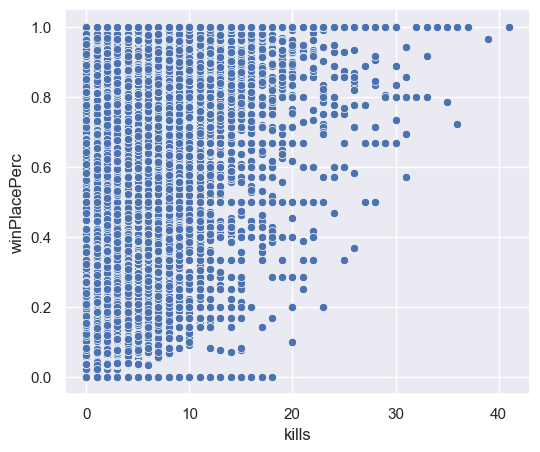

In [193]:
sns.scatterplot(x=df.loc[df["kills"]<44.5,"kills"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["kills"]<44.5]

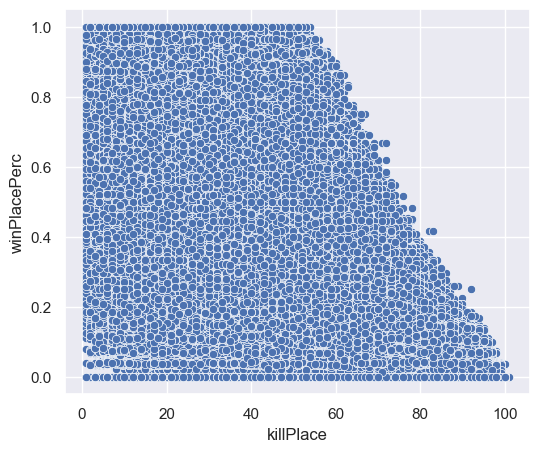

In [194]:
sns.scatterplot(x=df.loc[(7*df["killPlace"]+400*df["winPlacePerc"]<780),"killPlace"],y=df["winPlacePerc"])
plt.show()
df=df.loc[(7*df["killPlace"]+400*df["winPlacePerc"]<780)]

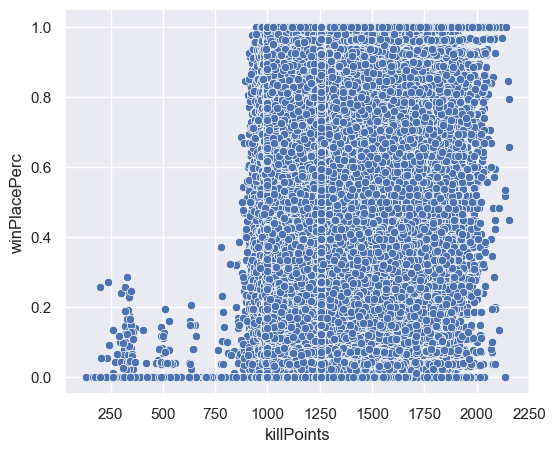

In [195]:
sns.scatterplot(x=df.loc[((df["killPoints"]>750)|(df["winPlacePerc"]<0.42)),"killPoints"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["killPoints"]>750)|(df["winPlacePerc"]<0.42))]

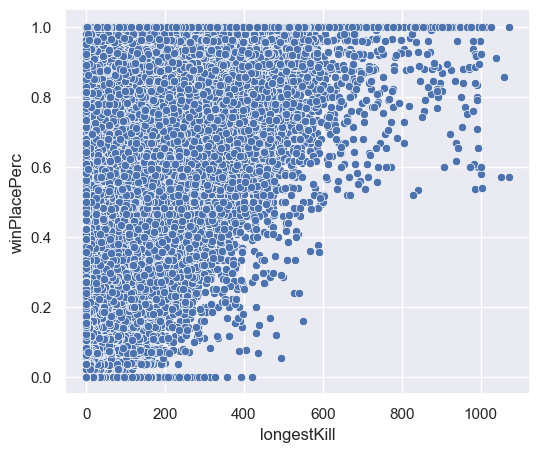

In [196]:
sns.scatterplot(x=df.loc[((df["longestKill"]<1075)&((df["longestKill"]<600)|(df["winPlacePerc"]>0.5))),"longestKill"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["longestKill"]<1075)&((df["longestKill"]<600)|(df["winPlacePerc"]>0.5)))]

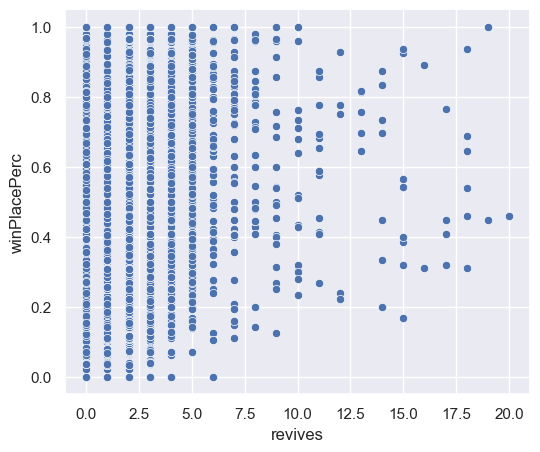

In [197]:
sns.scatterplot(x=df.loc[df["revives"]<22.5,"revives"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["revives"]<22.5]

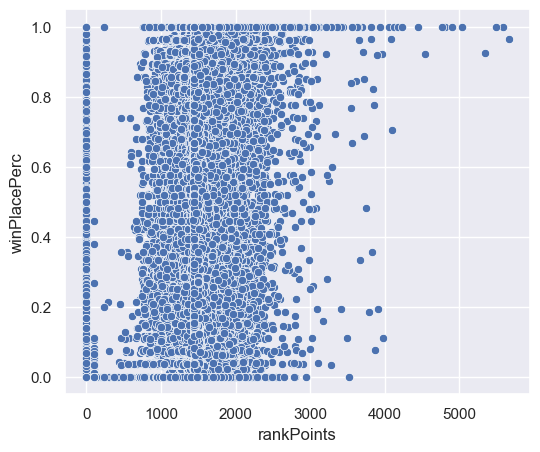

In [198]:
sns.scatterplot(x=df.loc[((df["rankPoints"]<4200)|(df["winPlacePerc"]>0.88)),"rankPoints"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["rankPoints"]<4200)|(df["winPlacePerc"]>0.88))]

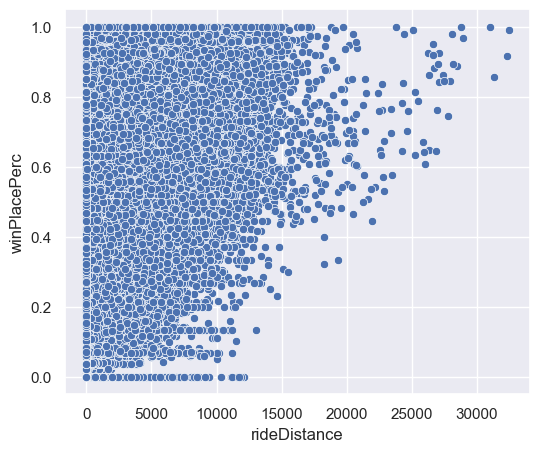

In [199]:
sns.scatterplot(x=df.loc[-df["rideDistance"]+22000*df["winPlacePerc"]>-13000,"rideDistance"],y=df["winPlacePerc"])
plt.show()
df=df.loc[-df["rideDistance"]+22000*df["winPlacePerc"]>-13000]

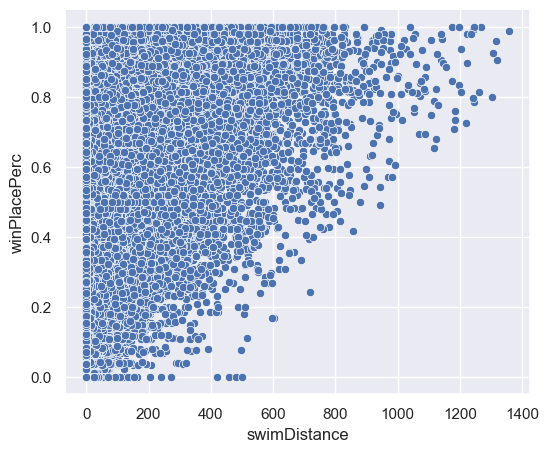

In [200]:
sns.scatterplot(x=df.loc[-df["swimDistance"]+975*df["winPlacePerc"]>-525,"swimDistance"],y=df["winPlacePerc"])
plt.show()
df=df.loc[-df["swimDistance"]+975*df["winPlacePerc"]>-525]

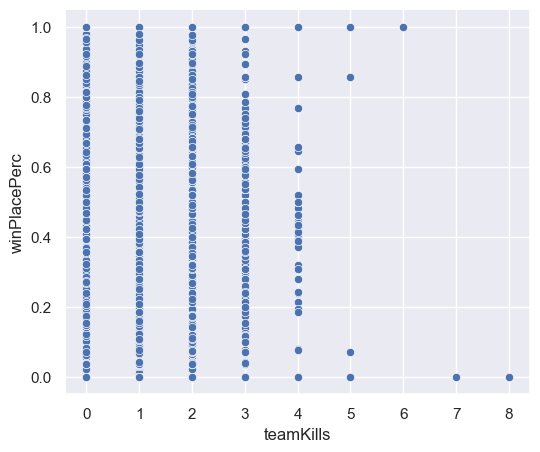

In [201]:
sns.scatterplot(x=df.loc[df["teamKills"]<8.5,"teamKills"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["teamKills"]<8.5]

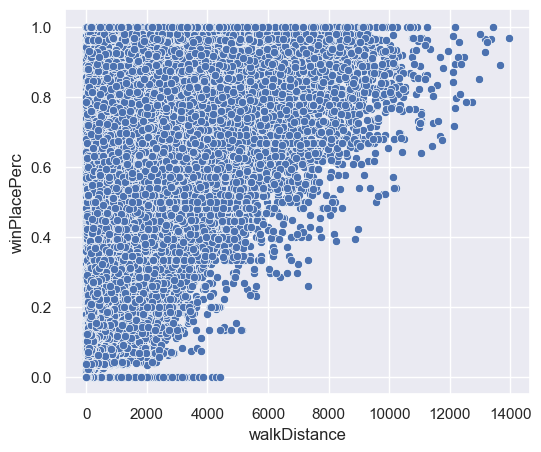

In [202]:
sns.scatterplot(x=df.loc[(-df["walkDistance"]+10000*df["winPlacePerc"]>-5000),"walkDistance"],y=df["winPlacePerc"])
plt.show()
df=df.loc[(-df["walkDistance"]+10000*df["winPlacePerc"]>-5000)]

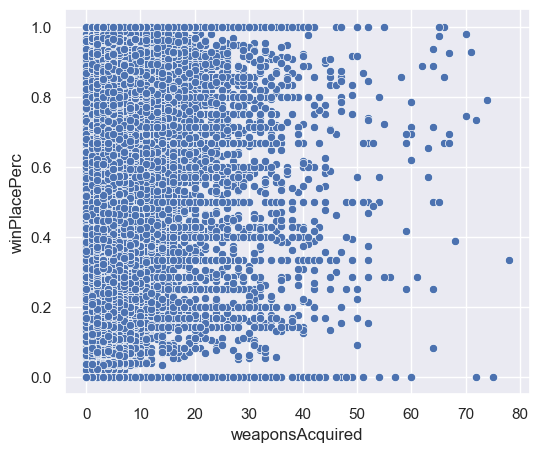

In [203]:
sns.scatterplot(x=df.loc[df["weaponsAcquired"]<80,"weaponsAcquired"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["weaponsAcquired"]<80]

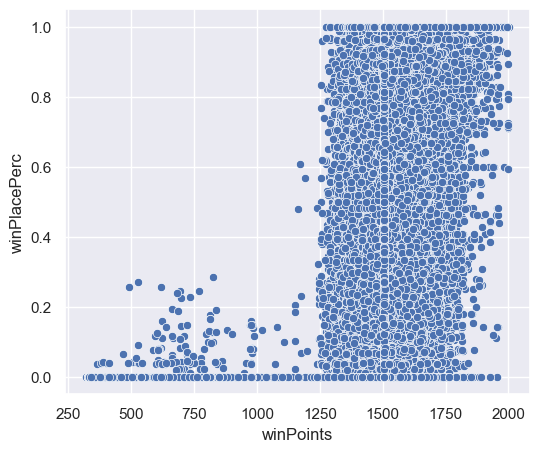

In [204]:
sns.scatterplot(x=df.loc[((df["winPoints"]>1100)|(df["winPlacePerc"]<0.32)),"winPoints"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["winPoints"]>1100)|(df["winPlacePerc"]<0.32))]

In [205]:
df

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0        2489947   645364     1976        0       1       186.00      0   
1        1412740   311343    13894        0       4       353.80      2   
2         628654   580803    15093        0       0         0.00      0   
3         740829   181474     4360        0       0         0.00      0   
4        2262435   816158    39502        0       0       119.70      2   
...          ...      ...      ...      ...     ...          ...    ...   
2979462  2925478  1577648    24994        0       8        29.83      0   
2979463  2918097   114277    24762        0       1         0.00      0   
2979464  1296258  1050496    26575        0       0         0.00      0   
2979465  1598131   195710    45357        0       1       386.20      1   
2979466  1720932  1618330    33060        0       0        50.31      0   

         headshotKills  heals  killPlace  ...  revives  rideDistance  \
0                    0      0         43  ...        0          0.00   
1                    1      7          4  ...        1       1877.00   
2                    0      1         65  ...        0          0.00   
3                    0      0         85  ...        0          0.00   
4                    0      0         18  ...        0          0.00   
...                ...    ...        ...  ...      ...           ...   
2979462              0      2         41  ...        0          0.00   
2979463              0      4         61  ...        0         86.49   
2979464              0      0         84  ...        0          0.00   
2979465              0      1          9  ...        0          0.00   
2979466              0      0         48  ...        0          0.00   

         roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                0           0.0          0                0         74.32   
1                0           0.0          0                0       1732.00   
2                0           0.0          0                0         75.47   
3                0           0.0          0                0        153.50   
4                0           0.0          0                0        194.20   
...            ...           ...        ...              ...           ...   
2979462          0           0.0          0                0       2052.00   
2979463          0           0.0          0                0       1053.00   
2979464          0           0.0          0                0          0.00   
2979465          0           0.0          0                0       2026.00   
2979466          0         181.5          0                0       1676.00   

         weaponsAcquired    winPoints  winPlacePerc  
0                      2  1505.571296        0.2604  
1                      4  1505.571296        0.7045  
2                      1  1694.000000        0.2692  
3                      2  1505.571296        0.1034  
4                      4  1505.571296        0.1923  
...                  ...          ...           ...  
2979462                5  1505.571296        0.9231  
2979463                3  1505.571296        0.4211  
2979464                0  1505.571296        0.0000  
2979465                6  1505.571296        0.7111  
2979466                5  1505.571296        0.8125  

[2979173 rows x 29 columns]

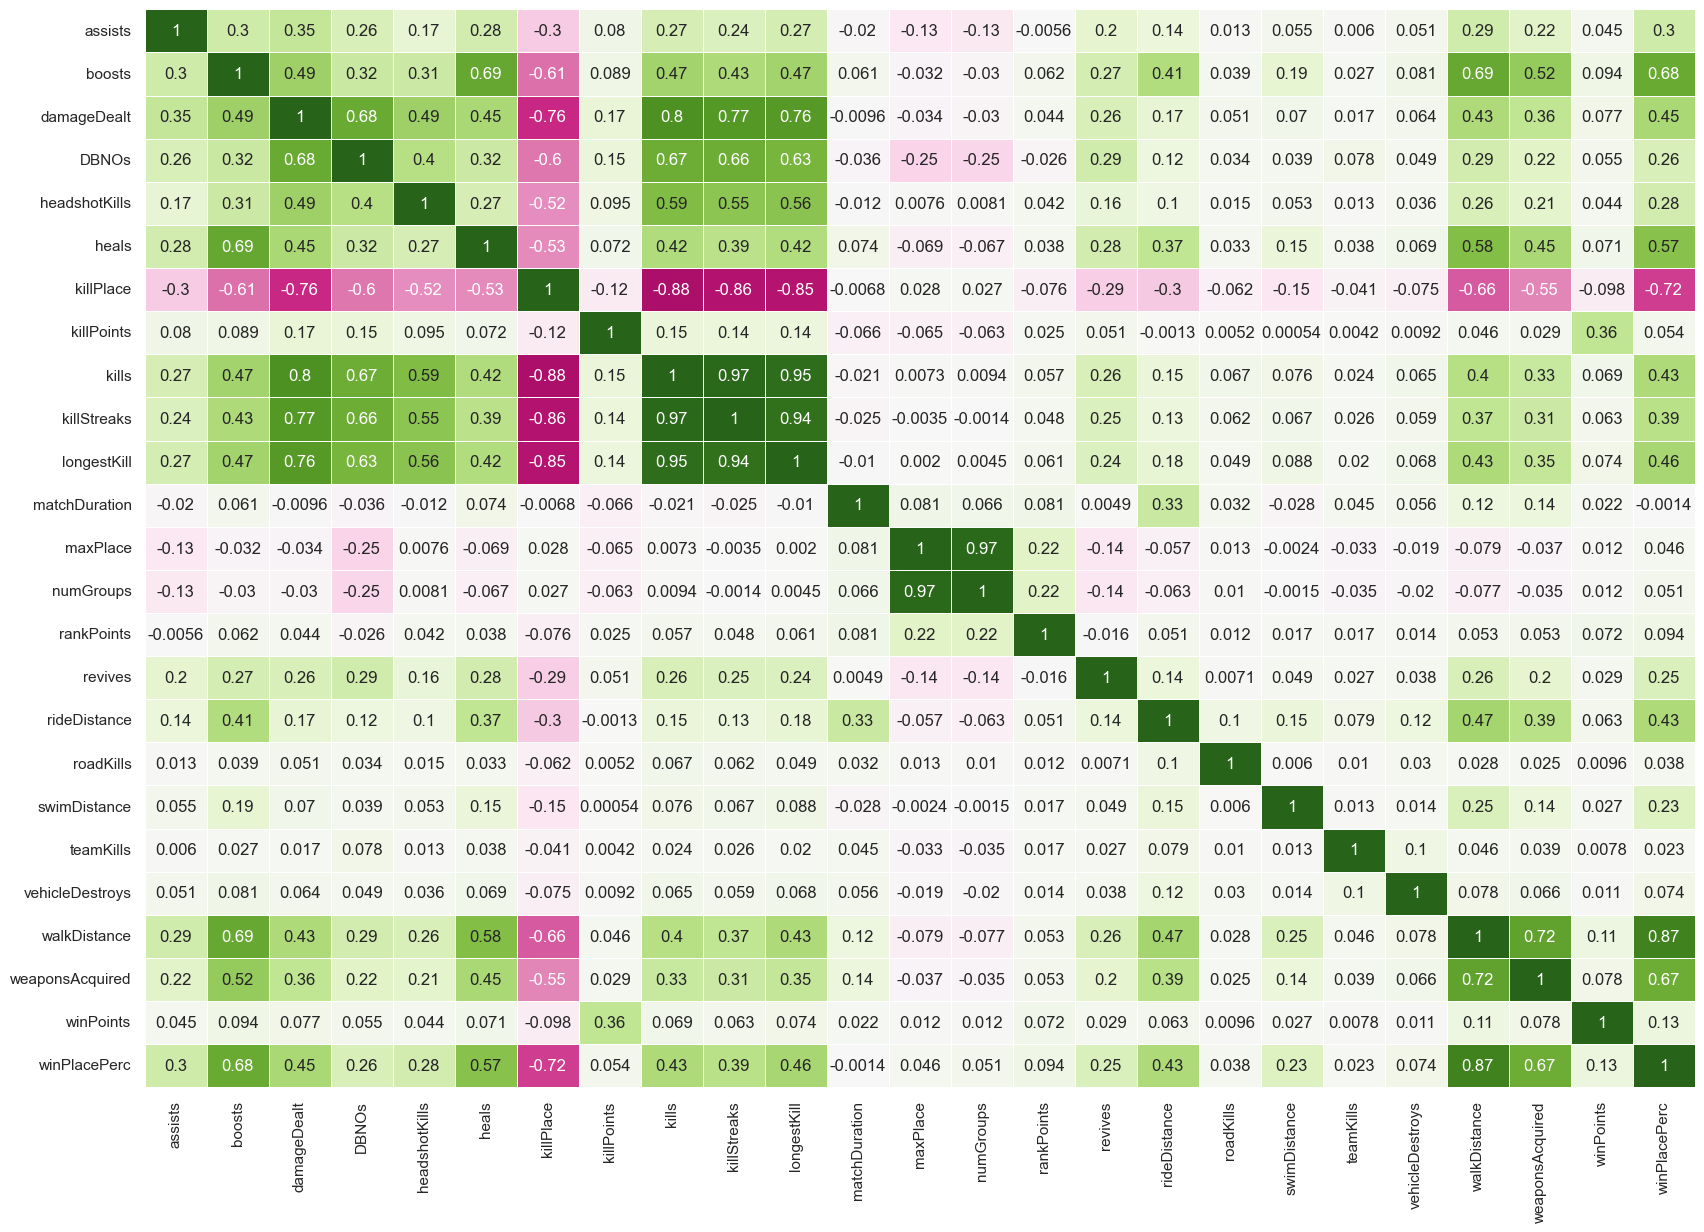

In [206]:
sns.set(rc={'figure.figsize':(20,14)})
dfnum=df.drop(axis="columns",labels=dfcat.columns.to_list())
sns.heatmap(dfnum.corr(method="spearman"),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()
sns.set(rc={'figure.figsize':(6,5)})

In [207]:
#df.drop(axis="columns",labels=["killPoints","kills","matchDuration","maxPlace","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPlace"],inplace=True)
df.drop(axis="columns",labels=["damageDealt","killPoints","kills","killStreaks","longestKill","maxPlace"],inplace=True)
df.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)

In [208]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [209]:
dfcat=pd.DataFrame()
dfcat["matchId"]=df["matchId"]
dfcat["Id"]=df["Id"]
dfcat["groupId"]=df["groupId"]
dfcat["matchType"]=df["matchType"]
dfcat.head()

matchId       Id  groupId  matchType
0     1976  2489947   645364         13
1    13894  1412740   311343          2
2    15093   628654   580803         14
3     4360   740829   181474         15
4    39502  2262435   816158         15

In [210]:
cramers_v(dfcat["matchId"],dfcat["matchType"])

0.9919202840331094

In [211]:
cramers_v(dfcat["groupId"],dfcat["matchType"])

0.659966994820988

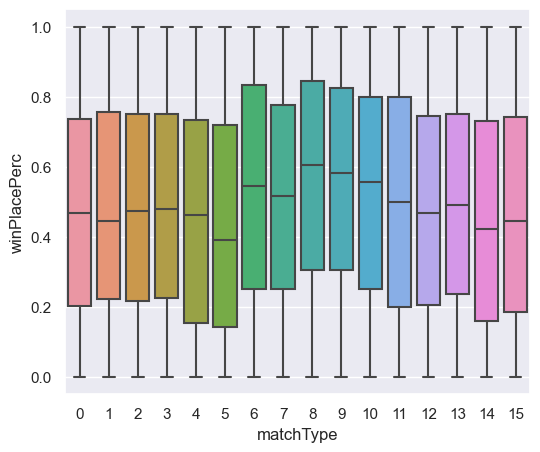

In [212]:
sns.boxplot(x=df["matchType"],y=df["winPlacePerc"])
plt.show()

In [213]:
df.drop(axis="columns",labels=["matchId","Id"],inplace=True)
dfnum=df.drop(axis="columns",labels=["groupId","matchType"])

In [214]:
for i in dfnum.columns:
    normcol=df[i]
    scaler=Standardizer(normcol.mean(),normcol.std())
    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
    df[i]=scaledcol    

In [215]:
testdf=pd.read_csv("test.csv")
mockdf=pd.read_csv("mocksubmission.csv")

In [216]:
testdf.head()

index              Id         groupId         matchId  assists  boosts  \
0  4289863  ab772932dc284b  6f0931849c42fc  7558d7990b8795        0       0   
1  3353859  f6e963587e1e61  f2724371458701  55d030157d6eb8        0       3   
2  1660760  eae2ba6cc7de4c  a8ddca0c7e8f74  0cf8e1dc70559e        0       2   
3  2555773  36d45a7e95b913  916c4c31723cdb  7b572f22974581        0       0   
4   363725  aa5867db86503b  76d57fc80f70f2  fc69844a437eae        3       2   

   damageDealt  DBNOs  headshotKills  heals  ...  rankPoints  revives  \
0        161.3      3              2      0  ...          -1        1   
1        191.5      1              1      4  ...        1500        0   
2        100.0      0              0      1  ...          -1        0   
3          0.0      0              0      0  ...        1500        0   
4        289.9      2              0      9  ...        1456        1   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0           0.0          0           0.0          0               0   
1        1580.0          1           0.0          0               0   
2         450.7          0           0.0          0               0   
3           0.0          0           0.0          0               0   
4        3950.0          0           0.0          0               0   

   walkDistance  weaponsAcquired  winPoints  
0         565.3                2       1660  
1         532.6                3          0  
2        1607.0                6       1593  
3         134.6                1          0  
4        2131.0                5          0  

[5 rows x 29 columns]

In [217]:
testdf.describe()

index       assists        boosts   damageDealt         DBNOs  \
count  1.467499e+06  1.467499e+06  1.467499e+06  1.467499e+06  1.467499e+06   
mean   2.224040e+06  2.338366e-01  1.105261e+00  1.306147e+02  6.574280e-01   
std    1.283737e+06  5.894493e-01  1.714207e+00  1.707144e+02  1.145833e+00   
min    2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.112835e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.225445e+06  0.000000e+00  0.000000e+00  8.400000e+01  0.000000e+00   
75%    3.335098e+06  0.000000e+00  2.000000e+00  1.859000e+02  1.000000e+00   
max    4.446960e+06  2.100000e+01  3.300000e+01  6.616000e+03  4.000000e+01   

       headshotKills         heals     killPlace    killPoints         kills  \
count   1.467499e+06  1.467499e+06  1.467499e+06  1.467499e+06  1.467499e+06   
mean    2.263763e-01  1.367918e+00  4.763471e+01  5.049424e+02  9.232572e-01   
std     6.015595e-01  2.679330e+00  2.746472e+01  6.273235e+02  1.556637e+00   
min     0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%     0.000000e+00  0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00   
50%     0.000000e+00  0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00   
75%     0.000000e+00  2.000000e+00  7.100000e+01  1.171000e+03  1.000000e+00   
max     4.600000e+01  8.000000e+01  1.000000e+02  2.170000e+03  6.600000e+01   

       ...    rankPoints       revives  rideDistance     roadKills  \
count  ...  1.467499e+06  1.467499e+06  1.467499e+06  1.467499e+06   
mean   ...  8.919865e+02  1.643238e-01  6.049406e+02  3.538674e-03   
std    ...  7.367163e+02  4.709999e-01  1.497957e+03  7.475404e-02   
min    ... -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ... -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  1.444000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  1.500000e+03  0.000000e+00  5.825000e-02  0.000000e+00   
max    ...  5.910000e+03  2.300000e+01  3.540000e+04  1.800000e+01   

       swimDistance     teamKills  vehicleDestroys  walkDistance  \
count  1.467499e+06  1.467499e+06     1.467499e+06  1.467499e+06   
mean   4.503466e+00  2.393392e-02     7.921641e-03  1.152835e+03   
std    3.057651e+01  1.672270e-01     9.240651e-02  1.182778e+03   
min    0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00     0.000000e+00  1.548000e+02   
50%    0.000000e+00  0.000000e+00     0.000000e+00  6.838000e+02   
75%    0.000000e+00  0.000000e+00     0.000000e+00  1.973000e+03   
max    3.823000e+03  5.000000e+00     4.000000e+00  1.537000e+04   

       weaponsAcquired     winPoints  
count     1.467499e+06  1.467499e+06  
mean      3.660266e+00  6.065319e+02  
std       2.456418e+00  7.396837e+02  
min       0.000000e+00  0.000000e+00  
25%       2.000000e+00  0.000000e+00  
50%       3.000000e+00  0.000000e+00  
75%       5.000000e+00  1.495000e+03  
max       1.530000e+02  2.013000e+03  

[8 rows x 25 columns]

In [218]:
mockdf.head()

Id  winPlacePerc
0   0           1.0
1   1           1.0
2   2           1.0
3   3           1.0
4   4           1.0

In [219]:
mockdf.describe()

Id  winPlacePerc
count  1.467499e+06     1467499.0
mean   7.337490e+05           1.0
std    4.236306e+05           0.0
min    0.000000e+00           1.0
25%    3.668745e+05           1.0
50%    7.337490e+05           1.0
75%    1.100624e+06           1.0
max    1.467498e+06           1.0

In [231]:
testdf.loc[testdf["rankPoints"]==-1,"rankPoints"]=np.nan
testdf.loc[((testdf["rankPoints"]!=-1) & (testdf["killPoints"]==0)),"killPoints"]=np.nan
testdf.loc[((testdf["rankPoints"]!=-1) & (testdf["winPoints"]==0)),"winPoints"]=np.nan

In [232]:
#mockdf.loc[mockdf["rankPoints"]==-1,"rankPoints"]=np.nan
#mockdf.loc[((mockdf["rankPoints"]!=-1) & (mockdf["killPoints"]==0)),"killPoints"]=np.nan
#mockdf.loc[((mockdf["rankPoints"]!=-1) & (mockdf["winPoints"]==0)),"winPoints"]=np.nan

In [233]:
testdf.loc[testdf["killPoints"].isna(),"killPoints"]=testdf["killPoints"].mean()
testdf.loc[testdf["winPoints"].isna(),"winPoints"]=testdf["winPoints"].mean()
testdf.loc[testdf["rankPoints"].isna(),"rankPoints"]=testdf["rankPoints"].mean()

In [234]:
#mockdf.loc[mockdf["killPoints"].isna(),"killPoints"]=mockdf["killPoints"].mean()
#mockdf.loc[mockdf["winPoints"].isna(),"winPoints"]=mockdf["winPoints"].mean()
##mockdf.loc[mockdf["rankPoints"].isna(),"rankPoints"]=mockdf["rankPoints"].mean()

In [235]:
new_type=lbl_encodr.fit_transform(testdf["groupId"])
testdf["groupId"]=new_type

In [237]:
testdf.head()

index              Id  groupId         matchId  assists  boosts  \
0  4289863  ab772932dc284b   466049  7558d7990b8795        0       0   
1  3353859  f6e963587e1e61  1015996  55d030157d6eb8        0       3   
2  1660760  eae2ba6cc7de4c   708063  0cf8e1dc70559e        0       2   
3  2555773  36d45a7e95b913   610271  7b572f22974581        0       0   
4   363725  aa5867db86503b   498549  fc69844a437eae        3       2   

   damageDealt  DBNOs  headshotKills  heals  ...   rankPoints  revives  \
0        161.3      3              2      0  ...  1445.892998        1   
1        191.5      1              1      4  ...  1500.000000        0   
2        100.0      0              0      1  ...  1445.892998        0   
3          0.0      0              0      0  ...  1500.000000        0   
4        289.9      2              0      9  ...  1456.000000        1   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0           0.0          0           0.0          0               0   
1        1580.0          1           0.0          0               0   
2         450.7          0           0.0          0               0   
3           0.0          0           0.0          0               0   
4        3950.0          0           0.0          0               0   

   walkDistance  weaponsAcquired    winPoints  
0         565.3                2  1660.000000  
1         532.6                3  1505.485226  
2        1607.0                6  1593.000000  
3         134.6                1  1505.485226  
4        2131.0                5  1505.485226  

[5 rows x 29 columns]

In [239]:
testdf["matchType"]

0          squad-fpp
1           crashfpp
2           solo-fpp
3              squad
4          squad-fpp
             ...    
1467494     solo-fpp
1467495    squad-fpp
1467496        squad
1467497    squad-fpp
1467498          duo
Name: matchType, Length: 1467499, dtype: object

In [240]:
new_type=lbl_encodr.fit_transform(testdf["matchType"])
testdf["matchType"]=new_type

In [241]:
#new_type=lbl_encodr.fit_transform(mockdf["groupId"])
#mockdf["groupId"]=new_type

In [242]:
#new_type=lbl_encodr.fit_transform(mockdf["MatchType"])
#mockdf["MatchType"]=new_type

In [243]:
testdf.drop(axis="columns",labels=["damageDealt","killPoints","kills","killStreaks","longestKill","maxPlace"],inplace=True)
testdf.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)
testdf.drop(axis="columns",labels=["matchId","Id"],inplace=True)

In [244]:
testdfnum=testdf.drop(axis="columns",labels=["groupId","matchType"])
for i in testdfnum.columns:
    normcol=testdf[i]
    scaler=Standardizer(normcol.mean(),normcol.std())
    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
    testdf[i]=scaledcol  

In [245]:
#mockdf.drop(axis="columns",labels=["damageDealt","killPoints","kills","killStreaks","longestKill","maxPlace"],inplace=True)
#mockdf.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)
#mockdf.drop(axis="columns",labels=["matchId","Id"],inplace=True)

In [246]:
#mockdfnum=testdf.drop(axis="columns",labels=["groupId","matchType"])
#for i in mockdfnum.columns:
 #   normcol=mockdf[i]
   # scaler=Standardizer(normcol.mean(),normcol.std())
   # scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
   # mockdf[i]=scaledcol  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [ ]:
X = df.drop('winPlacePerc', 1)
y = df['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

/var/folders/sp/xc7c2xjd47gdy44x8cr5hqlh0000gn/T/ipykernel_54264/3912144903.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('winPlacePerc', 1)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

lreg = model.fit(X_train, y_train)

In [ ]:
print("Train Score:", lreg.score(X_train, y_train))
print("Test Score:", lreg.score(X_test, y_test))

Train Score: 0.7805638620413311
Test Score: 0.7799987740706196


In [ ]:
testdf.head()

index  groupId   assists    boosts     DBNOs  headshotKills     heals  \
0  1.609226   466049 -0.396704 -0.644765  2.044427       2.948376 -0.510545   
1  0.880102  1015996 -0.396704  1.105315  0.298972       1.286030  0.982366   
2 -0.438782   708063 -0.396704  0.521955 -0.573756      -0.376316 -0.137317   
3  0.258412   610271 -0.396704 -0.644765 -0.573756      -0.376316 -0.510545   
4 -1.449141   498549  4.692793  0.521955  1.171700      -0.376316  2.848504   

   killPlace  matchType   revives  rideDistance  swimDistance  walkDistance  \
0  -1.479524         15  1.774260     -0.403844     -0.147285     -0.496742   
1  -1.479524          0 -0.348883      0.650926     -0.147285     -0.524388   
2  -0.860548         13 -0.348883     -0.102967     -0.147285      0.383981   
3   1.396893         14 -0.348883     -0.403844     -0.147285     -0.860884   
4  -1.224651         15  1.774260      2.233081     -0.147285      0.827006   

   weaponsAcquired  
0        -0.675889  
1        -0.268792  
2         0.952499  
3        -1.082986  
4         0.545402

In [ ]:
df.head()

groupId   assists    boosts     DBNOs  headshotKills     heals  killPlace  \
0   645364 -0.398176 -0.062749 -0.575492      -0.380284 -0.511598  -0.166918   
1   311343 -0.398176  1.685144  1.174008       1.297444  2.100264  -1.587087   
2   580803 -0.398176 -0.645380 -0.575492      -0.380284 -0.138475   0.634204   
3   181474 -0.398176 -0.645380 -0.575492      -0.380284 -0.511598   1.362496   
4   816158 -0.398176 -0.645380  1.174008      -0.380284 -0.511598  -1.077283   

   matchType   revives  rideDistance  swimDistance  walkDistance  \
0         13 -0.349461     -0.405144     -0.150019     -0.913045   
1          2  1.771164      0.848593     -0.150019      0.487721   
2         14 -0.349461     -0.405144     -0.150019     -0.912073   
3         15 -0.349461     -0.405144     -0.150019     -0.846137   
4         15 -0.349461     -0.405144     -0.150019     -0.811744   

   weaponsAcquired  winPlacePerc  
0        -0.681960     -0.691308  
1         0.140200      0.753352  
2        -1.093039     -0.662682  
3        -0.681960     -1.202030  
4         0.140200     -0.912838

In [ ]:
print(df.shape)
print(testdf.shape)

(2979173, 14)
(1467499, 14)


In [ ]:
pred = lreg.predict(testdf)

/Users/vaibhavsharma/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- index

  warnings.warn(message, FutureWarning)


ValueError: X has 14 features, but LinearRegression is expecting 13 features as input.

In [ ]:
submission = pd.DataFrame.from_dict(data={'Id': testdf['Id'], 'winPlacePerc': pred})

submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)